Operasi Image Filtering dan Thresholding

Image Filtering

Import Library

In [1]:
# memanggil modul yang diperlukan
# digunakan untuk pemrosesan gambar dan komputer visi
import cv2
# digunakan untuk operasi array dan manipulasi data numerik
import numpy as np

from matplotlib import pyplot as plt


Load Image

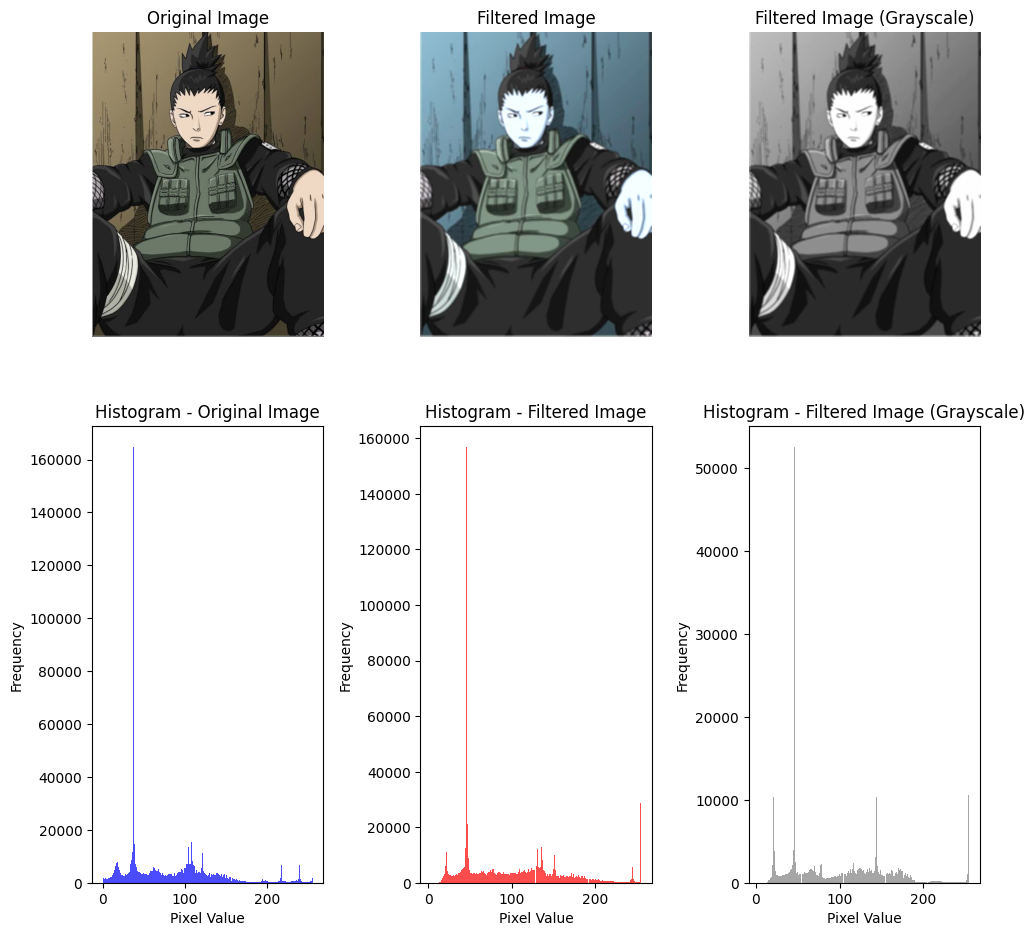

In [2]:
# Baca gambar
img = cv2.imread('Shikamaru.jpeg')

# Ubah dari BGR ke RGB
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengatur ukuran plot jika perlu
plt.rcParams["figure.figsize"] = (10, 10)

# Tampilkan gambar asli
plt.subplot(231)
plt.imshow(cat)
plt.title('Original Image')
plt.axis('off')

# Buat filter dengan matriks 5x5
kernel = np.ones((5, 5), np.float32) / 20

# Lakukan filtering
kucing_filter = cv2.filter2D(img, -1, kernel)

# Tampilkan hasil filtering
plt.subplot(232)
plt.imshow(kucing_filter)
plt.title('Filtered Image')
plt.axis('off')

# Ubah hasil filter ke grayscale
kucing_gray = cv2.cvtColor(kucing_filter, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar hasil filter dalam skala abu-abu
plt.subplot(233)
plt.imshow(kucing_gray, cmap='gray')
plt.title('Filtered Image (Grayscale)')
plt.axis('off')

# Tampilkan histogram gambar asli
plt.subplot(234)
plt.hist(img.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram - Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Tampilkan histogram gambar hasil filter
plt.subplot(235)
plt.hist(kucing_filter.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histogram - Filtered Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Tampilkan histogram gambar hasil filter dalam skala abu-abu
plt.subplot(236)
plt.hist(kucing_gray.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram - Filtered Image (Grayscale)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Tampilkan semua gambar
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frekuensi')

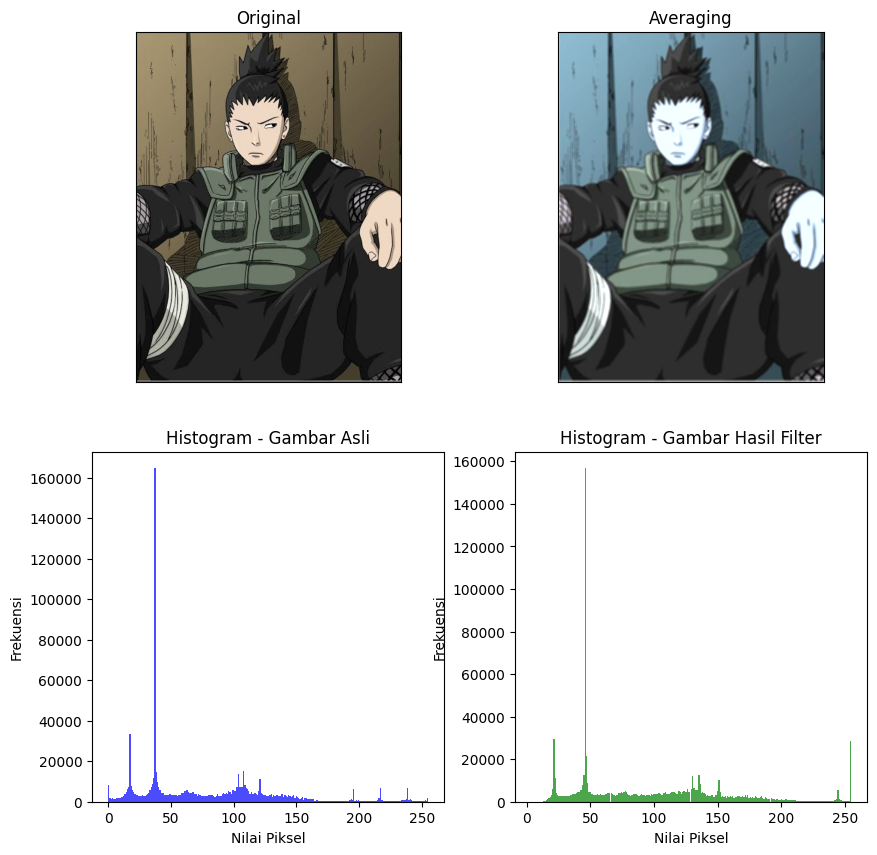

In [3]:
# Mengatur ukuran plot jika perlu
plt.rcParams["figure.figsize"] = (10, 10)

# Plot pertama - Gambar asli
plt.subplot(221)
plt.imshow(cat)
plt.title('Original')
plt.xticks([]), plt.yticks([])

# Plot kedua - Hasil filter
plt.subplot(222)
plt.imshow(kucing_filter)
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot ketiga - Histogram gambar asli
plt.subplot(223)
plt.hist(cat.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram - Gambar Asli')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

# Plot keempat - Histogram gambar hasil filter
plt.subplot(224)
plt.hist(kucing_filter.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histogram - Gambar Hasil Filter')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

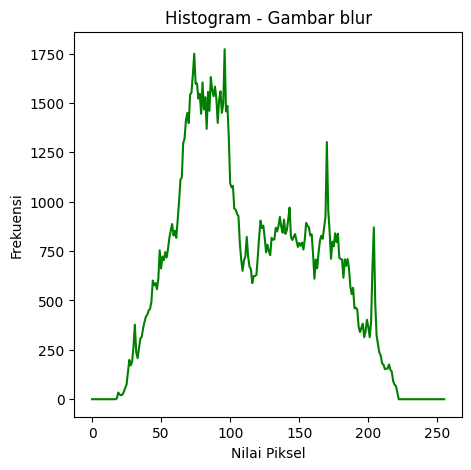

In [13]:
# Menghasilkan gambar terblur menggunakan cv2.blur()
kucing_blur = cv2.blur(img, (5,5))

# Menghitung histogram dari gambar asli menggunakan cv2.calcHist()
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])

# Menghitung histogram dari gambar terblur menggunakan cv2.calcHist()
hist_blurred = cv2.calcHist([kucing_blur], [0], None, [256], [0, 256])

# Mengatur ukuran plot jika perlu
plt.rcParams["figure.figsize"] = (5, 5)

# Membuat plot histogram menggunakan matplotlib
plt.figure()
plt.plot(hist_blurred, color='green')
plt.title('Histogram - Gambar blur')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')


[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


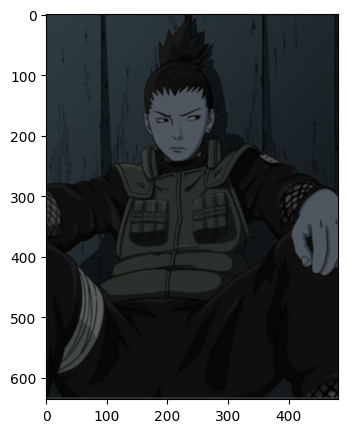

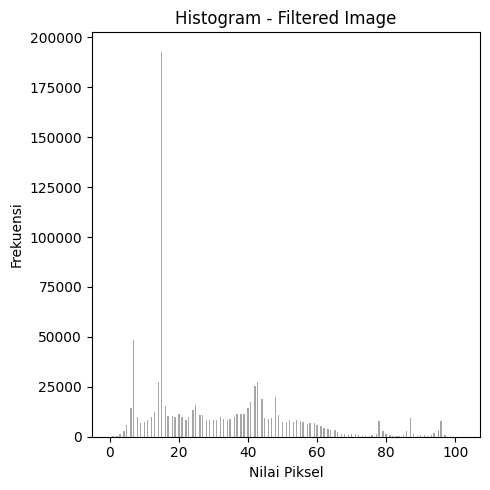

In [5]:
# Definisikan kernel filter rata-rata dengan matriks 3x3
kernel = np.array([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]
        ], dtype=np.float32) / 25
print(kernel)

# Lakukan filtering menggunakan cv2.filter2D()
kucing_filter = cv2.filter2D(img, -1, kernel)

# Tampilkan hasil filtering menggunakan plt.imshow()
plt.imshow(kucing_filter)

# Tampilkan histogram gambar hasil filter menggunakan plt.hist()
plt.figure()
plt.hist(kucing_filter.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogram - Filtered Image')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

# Menyusun tampilan plot agar rapi menggunakan plt.tight_layout()
plt.tight_layout()
plt.show()


High-Pass Filtering

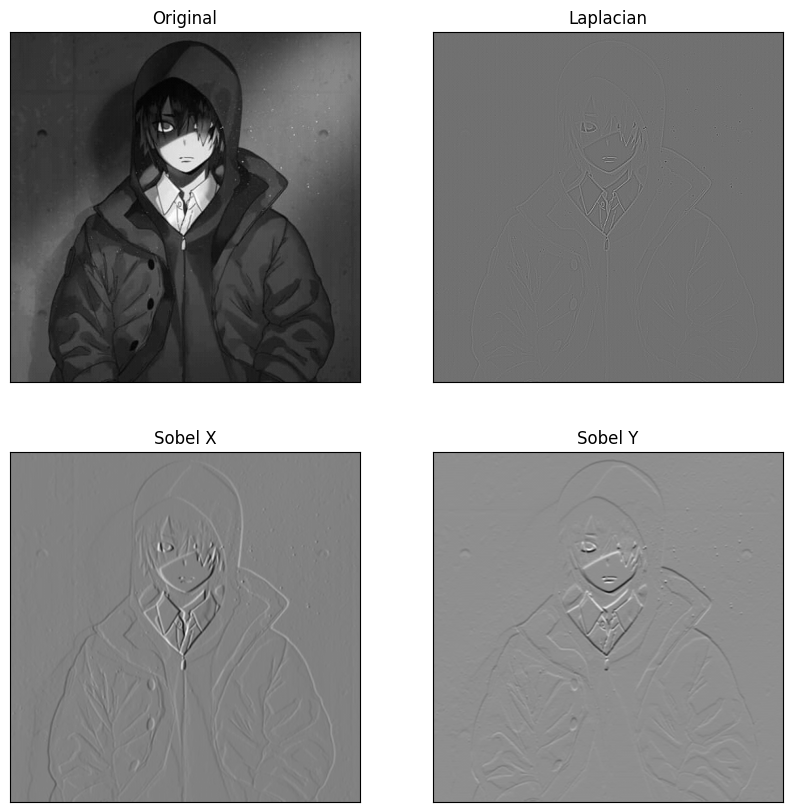

In [6]:
# Memuat citra sebagai grayscale (argument 0)
img = cv2.imread('Random.jpg', 0)

# Menerapkan algoritma high-pass filtering: Laplacian
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Menerapkan algoritma high-pass filtering: Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (10, 10)

# Menampilkan citra asli
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# Menampilkan hasil filter Laplacian
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

# Menampilkan hasil filter Sobel (gradien dalam sumbu X)
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

# Menampilkan hasil filter Sobel (gradien dalam sumbu Y)
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

# Menampilkan semua plot
plt.show()

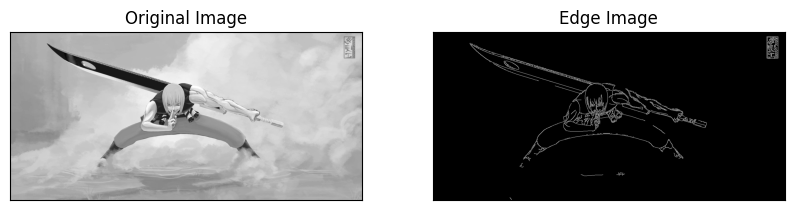

In [7]:
# Memuat citra sebagai grayscale (argument 0)
img = cv2.imread('Suigetsu.jpg', 0)

# Memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img, 100, 200)

# Menampilkan citra asli
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Menampilkan citra hasil deteksi tepi
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Menampilkan semua plot
plt.show()

Image Thresholding

Menggunakan OpenCV untuk Thresholding

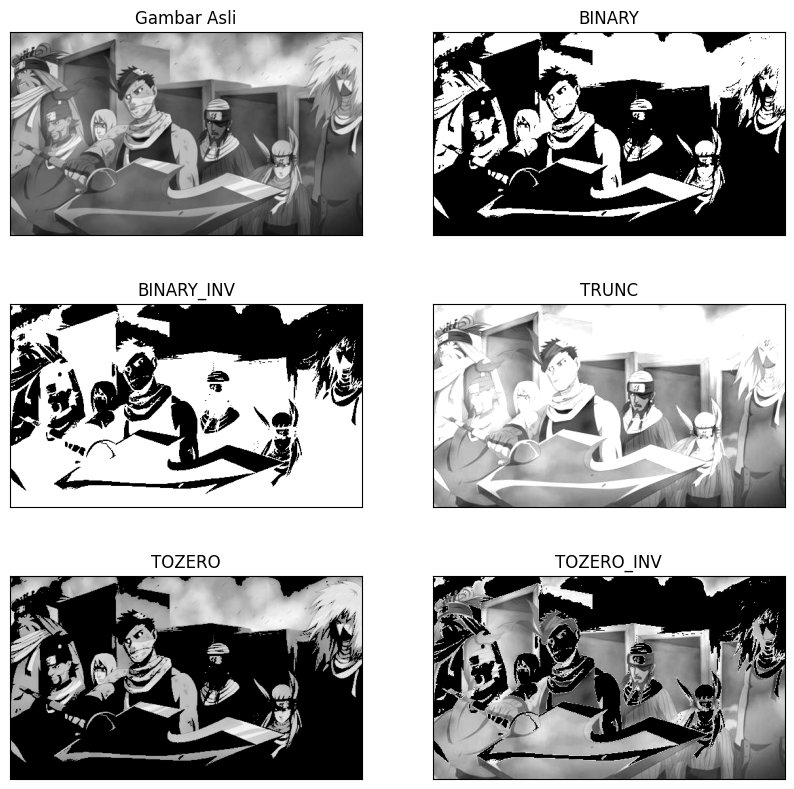

In [8]:
# Membaca gambar '300.jpg' sebagai grayscale (argument 0)
img = cv2.imread('300.jpg', 0)

# Menghitung threshold
# Menggunakan cv2.threshold untuk menghasilkan citra biner dengan threshold 127
# dan maksimal value 255 untuk setiap metode thresholding yang berbeda
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Menampilkan hasil
# Membuat list titles yang berisi label untuk setiap citra yang akan ditampilkan
titles = ['Gambar Asli', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

# Membuat list images yang berisi citra asli dan citra hasil thresholding
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Menampilkan beberapa gambar sekaligus
# Menggunakan loop for untuk mengakses setiap citra dan judulnya
for i in range(6):
    # Mengatur grid plot menjadi 3 baris, 2 kolom
    plt.subplot(3, 2, i+1)
    plt.imshow(images[i], 'gray')  # Menampilkan citra dalam skala abu-abu
    plt.title(titles[i])  # Menampilkan judul sesuai dengan metode thresholding yang digunakan
    plt.xticks([])  # Menonaktifkan sumbu x
    plt.yticks([])  # Menonaktifkan sumbu y

# Menampilkan semua plot
plt.show()


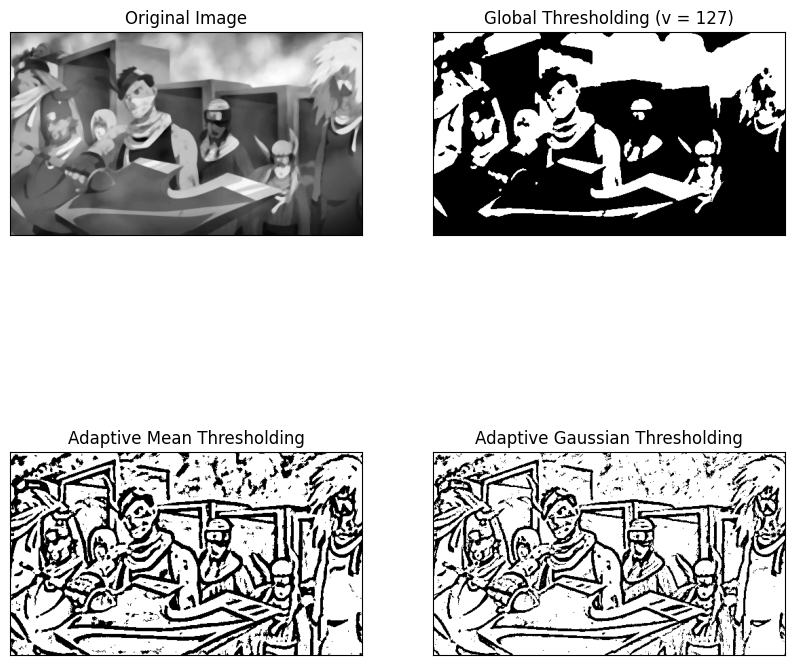

In [9]:
# Melakukan median blur pada citra menggunakan kernel 5x5
img = cv2.medianBlur(img,5)

# Melakukan thresholding global dengan nilai threshold 127
# Menggunakan metode cv2.THRESH_BINARY
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Melakukan thresholding adaptif menggunakan metode Mean
# dengan ukuran block 11x11 dan konstanta C 2
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Melakukan thresholding adaptif menggunakan metode Gaussian
# dengan ukuran block 11x11 dan konstanta C 2
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

# Menyimpan judul untuk setiap citra yang akan ditampilkan
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# Menampilkan citra-citra dalam bentuk grid plot
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

# Menampilkan citra-citra dalam bentuk grid plot
plt.show()